### Open CV
 - Open Source Computer Vision Library는 오픈소스 이미지(동영상) 라이브러리
 - 이미지 형식 변환, 필터 처리, 얼굴 인식, 물체 인식, 문자 인식 등 이미지와 관련된 다양한 처리
 - 머신러닝에서 OpenCV 사용 : 머신러닝의 입력으로 전달하려면 이미지를 숫자 배열 데이터로 변경
 - pip install opencv-python

In [1]:
!pip install opencv-python

In [2]:
# 이미지 다운로드
import urllib.request as req
import cv2
url = 'http://uta.pw/shodou/img/28/214.png'
req.urlretrieve(url, 'test.png') # url리트라이브로 주소에 있는것을 가져온다. 거기에 test.png라고 이름 부여
# OpenCV로 읽어들이기
img = cv2.imread('test.png') #cv2를 이용해서 imread함수로 이미지를 숫자로 바꿔주는 것
print(img)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


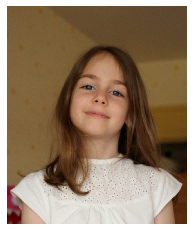

In [3]:
# 다운로드한 이미지 출력하기
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

filepath = 'girl.jpg'
img = cv2.imread(filepath) # 이미지를 숫자로 변경
plt.axis('off') # axis 출력 끄기(눈금자 끄기)
# openCV BGR(파녹빨) 인 반면 matplotlib RGB(빨녹파) 순서
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
plt.close()

In [4]:
import cv2

# 이미지 읽어 들이기
filepath = 'girl.jpg'
img = cv2.imread(filepath)

# 이미지 저장하기
cv2.imwrite("out.png", img)

True

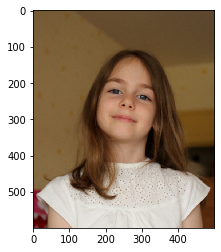

In [5]:
import matplotlib.pyplot as plt
import cv2

# 이미지 읽어들이기
img = cv2.imread('out.png') # 이미지 파일 읽어오기
# plt.axis('off')
# 이미지 크기 변경하기
im2 = cv2.resize(img, (500,600)) #img, (width, height)
# 크기 변경한 이미지 저장하기
cv2.imwrite('out-resize.png', im2) # imwrite 는 im2를 ''이름으로 저장

# 이미지 출력하기
plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
plt.show()
plt.close()

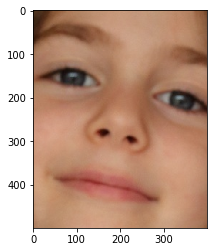

In [19]:
import matplotlib.pyplot as plt
import cv2

# 이미지 읽어 들이기
img = cv2.imread('out.png')
# plt.axis('off')
# 이미지 자르기
im2 = img[360:660,400:640]
#이미지 크기 변경
im2 = cv2.resize(im2, (400, 500))
# 크기 변경한 이미지 저장
cv2.imwrite('cut-resize.png', img)

#이미지 출력하기
plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
# plt.imshow(im2) # 활성화 하면 BGR 로 나오게된다.(이상한 색)
plt.show()
plt.close()

#### 얼굴 검출 - 자동으로 얼굴에 모자이크 처리
 - 인간의 얼굴이 어디 있는지 검출
 - 사람의 얼굴을 검출하고 자동으로 모자이크 처리 \
사생활 보호를 위해 관계없는 사람의 얼굴 자동으로 모자이크 처리 \
얼굴 인식을 사용해 사람 얼굴이 있는 사진을 자동으로 수집

얼굴의 좌표= 319 308 405 405


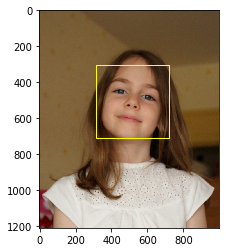

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# 캐스케이스 파일 지정해서 검출기 생성하기
# openCV는 haar-like 특징 학습기라고 부르는 머신러닝을 사용해 얼굴 인식
# 캐스케이드 파일(얼굴요소 DB)를 사용해 눈, 코, 입과 같은 요소의 위치 관계를 확인하고
# 얼굴인지 확인(정면, 웃는얼굴, 눈, 몸, 전체 검출 등 다양한 캐스케이스 파일)
# http://github.com/opencv/opencv/tree/master/data/haarcascades
cascade_file = 'haarcascade_frontalface_alt.xml' # 캐스케이드 파일, 정면얼굴에 대한 DB
cascade = cv2.CascadeClassifier(cascade_file) # 얼굴 검출기에다가 DB를 입력해서 자동분류처리

# 이미지를 읽어 들이고 그레이스케일로 변환하기( 명암 패턴을 결합해 얼굴 형태 확인 )
filepath = 'girl.jpg'
img = cv2.imread(filepath)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# print(img_gray)

# 얼굴 인식하기
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150)) # 그레이스케일 한 이미지로 얼굴 인식
# print(face_list)

#결과 확인하기
if len(face_list)==0:
    print('얼굴 인식 실패')
    quit()
    
#인식한 부분 표시하기 --(*5)
for (x,y,w,h) in face_list:
    print("얼굴의 좌표=",x,y,w,h)
    yellow = (0,255,255)
    cv2.rectangle(img, (x,y), (x+w, y+h), yellow, thickness=7)
    
#이미지 출력하기
cv2.imwrite("face-detect.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [21]:
import cv2

def mosaic(img, rect, size):
    # 모자이크 적용할 부분 추출하기
    (x1, y1, x2, y2) = rect
    w = x2 - x1
    h = y2 - y1
    i_rect = img[y1:y2, x1:x2]
    # 축소하고 확대하기
    i_small = cv2.resize(i_rect, ( size, size))
    i_mos = cv2.resize(i_small, (w, h), interpolation=cv2.INTER_AREA)
    # 모자이크 적용하기
    img2 = img.copy()
    img2[y1:y2, x1:x2] = i_mos
    return img2

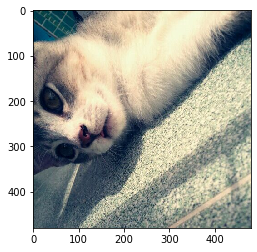

In [27]:
img = cv2.imread('cat.png')
#이미지 출력하기
cv2.imwrite('cat.png', img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
plt.close()

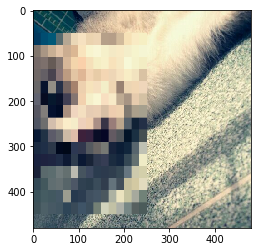

In [36]:
import matplotlib.pyplot as plt
import cv2
from mosaic import mosaic as mosaic

# 이미지를 읽어 들이고 모자이크 처리하기
img = cv2.imread('cat.png')
mos = mosaic(img, (0,50,250,450),15)  # ), 10) 숫자 조절로 모자이크 농도 조절 가능

#이미지 출력하기
cv2.imwrite('cat-mosaic.png', mos)
plt.imshow(cv2.cvtColor(mos, cv2.COLOR_BGR2RGB))
plt.show()
plt.close()

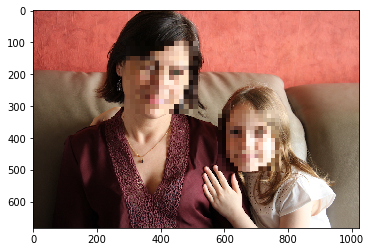

In [42]:
# 사람 얼굴에 자동으로 모자이크 처리

# 캐스케이드 파일 지정해서 검출기 생성하기
cascade_file = 'haarcascade_frontalface_alt.xml'
cascade = cv2.CascadeClassifier(cascade_file)

# 이미지를 읽어 들이고 그레이스케일로 변환
img = cv2.imread('family.jpg')
# img = cv2.imread('myphoto.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#얼굴 검출하기
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))
if len(face_list) ==0:
    quit()
    
# 인식한 부분에 모자이크 처리하기
for (x,y,w,h) in face_list:
    img = mosaic(img, (x, y, x+w, y+h), 15)
    
# 이미지 출력하기
cv2.imwrite('family-mosaic.png', img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

===0===
얼굴의 좌표= 319 308 405 405
===10===
얼굴의 좌표= 394 385 409 409
===20===
얼굴의 좌표= 451 444 408 408
===30===
얼굴의 좌표= 494 483 409 409
===40===
===50===
===60===
===70===
===80===


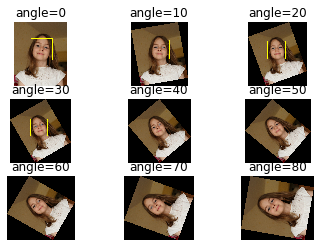

In [46]:
# Open CV 의 얼굴 검출은 옆모습과 기울어진 얼굴을 잘 검출 못함

import matplotlib.pyplot as plt
import cv2
from scipy import ndimage

# 캐스케이드 파일 지정해서 검출기 생성하기
cascade_file = 'haarcascade_frontalface_alt.xml'
cascade = cv2.CascadeClassifier(cascade_file)
img = cv2.imread('girl.jpg')

# 얼굴 검출하고 영역 표시하기
def face_detect(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_list = cascade.detectMultiScale(img_gray, minSize=(300,300))
    #인식한 부분 표시하기
    for (x,y,w,h) in face_list:
        print('얼굴의 좌표=', x, y, w, h)
        yellow = (0,255,255)
        cv2.rectangle(img, (x,y), (x+w, y+h), yellow, thickness=7)
        
# 여러 각도의 이미지를 만들고 테스트 하기
for i in range(0, 9):
    ang  = i * 10
    print('==='+str(ang)+'===')
    img_r = ndimage.rotate(img,ang)
    face_detect(img_r)
    plt.subplot(3,3, i+1)
    plt.axis('off')
    plt.title('angle='+str(ang))
    plt.imshow(cv2.cvtColor(img_r, cv2.COLOR_BGR2RGB))

plt.show()